In [3]:
import os 
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [4]:
train_data = pd.read_csv('../input/titanic/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/titanic/train.csv'

In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Age, Cabin, Embarked have Null value


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 38% Survived ????

<AxesSubplot:xlabel='Pclass', ylabel='count'>

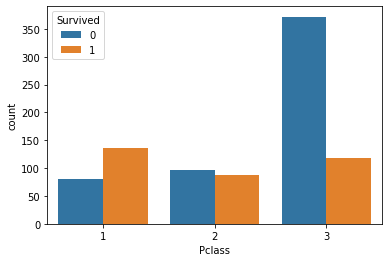

In [ ]:
sns.countplot(data = train_data,x='Pclass',hue = 'Survived')

* People who buy Pclass 3 died more and Pclass 3 is the most bought
* People who buy Pclass 1 have higher Survived rate 

<AxesSubplot:>

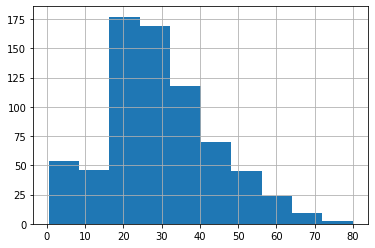

In [ ]:
train_data['Age'].hist()

* Most frequently Age is 19-22

<AxesSubplot:xlabel='Sex', ylabel='count'>

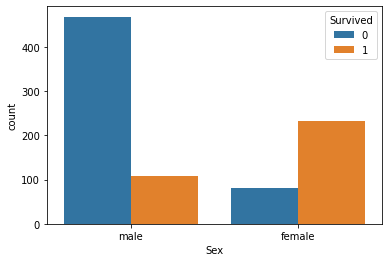

In [ ]:
sns.countplot(data = train_data,x='Sex',hue = 'Survived')

* Male rate is higher but Male Survived rate lower than Female Survived

<AxesSubplot:xlabel='Embarked', ylabel='count'>

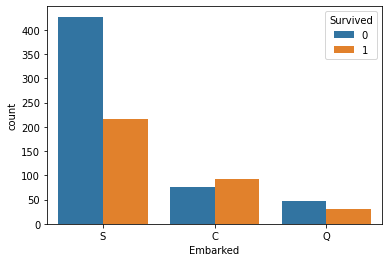

In [ ]:
sns.countplot(data= train_data,x='Embarked',hue='Survived')

# Preprocessing Data 

In [ ]:
new_train_data = train_data.copy()

In [ ]:
new_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Pclass

In [ ]:
new_train_data.groupby(by=['Pclass']).mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

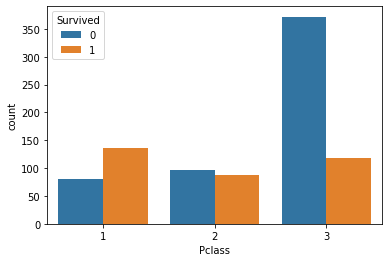

In [ ]:
sns.countplot(data=new_train_data,x='Pclass',hue='Survived')

## Family

In [ ]:
new_train_data['Relative_Family'] = new_train_data['SibSp'] + new_train_data['Parch']

In [ ]:
new_train_data.drop(columns = ['SibSp','Parch'],inplace = True)

<AxesSubplot:xlabel='Relative_Family', ylabel='count'>

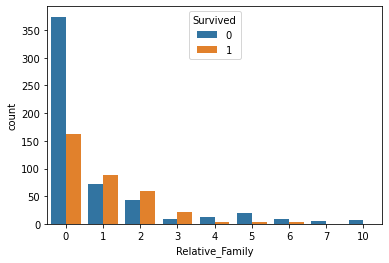

In [ ]:
sns.countplot(data = new_train_data,x='Relative_Family',hue = 'Survived')

We can categorize them into 2 group

In [ ]:
def cate_family(x):
    if x == 0 or x > 3:
        return 0
    elif x<=3:
        return 1

In [ ]:
new_train_data['Relative_Family'] = new_train_data['Relative_Family'].apply(lambda x:cate_family(x))

<AxesSubplot:xlabel='Relative_Family', ylabel='count'>

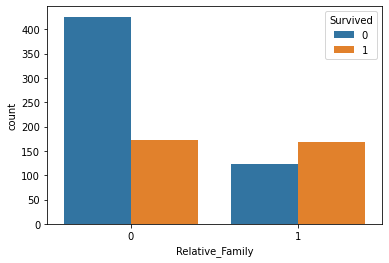

In [ ]:
sns.countplot(data = new_train_data,x='Relative_Family',hue='Survived')

## Age

In [ ]:
new_train_data[new_train_data['Age'] >=70]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative_Family
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,PC 17754,34.6542,A5,C,0
116,117,0,3,"Connors, Mr. Patrick",male,70.5,370369,7.7500,NaN,Q,0
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,PC 17609,49.5042,NaN,C,0
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,27042,30.0000,A23,S,0
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,C.A. 24580,10.5000,NaN,S,0
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,WE/P 5735,71.0000,B22,S,1
851,852,0,3,"Svensson, Mr. Johan",male,74.0,347060,7.7750,NaN,S,0


In [ ]:
mean_higher_65 = new_train_data['Age'][new_train_data['Age'] >=65].mean()
mean_higher_65

69.77272727272727

In [ ]:
new_train_data['Age'] = new_train_data['Age'].apply(lambda x: mean_higher_65 if x >= 70 else x)

In [ ]:
new_train_data['Age'] = new_train_data['Age'].fillna(new_train_data['Age'].median())

In [ ]:
new_train_data['Age'] = new_train_data['Age'] // 15 * 15

<AxesSubplot:xlabel='Age', ylabel='count'>

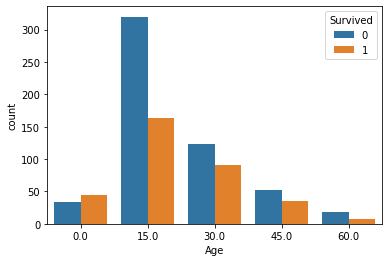

In [ ]:
sns.countplot(data= new_train_data,x='Age',hue='Survived')

## Fare

In [ ]:
new_train_data[new_train_data['Fare'] > 300 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative_Family
258,259,1,1,"Ward, Miss. Anna",female,30.0,PC 17755,512.3292,NaN,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,30.0,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,30.0,PC 17755,512.3292,B101,C,0


In [ ]:
outliers_fare = new_train_data[(new_train_data['Fare']<100) & (new_train_data['Embarked'] == 'C') ].mean()['Fare']
outliers_fare

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


31.270507913669075

In [ ]:
new_train_data['Fare'] = new_train_data['Fare'].apply(lambda x: outliers_fare if x>300 else x)

<AxesSubplot:>

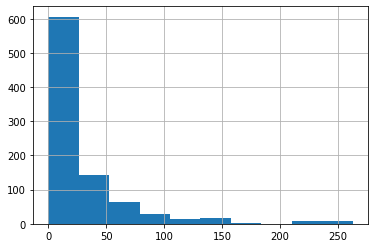

In [ ]:
new_train_data['Fare'].hist()

In [ ]:
new_train_data['Fare_per_person'] = np.where(new_train_data['Relative_Family'] != 0,new_train_data['Fare'] / new_train_data['Relative_Family'],new_train_data['Fare'])

<AxesSubplot:>

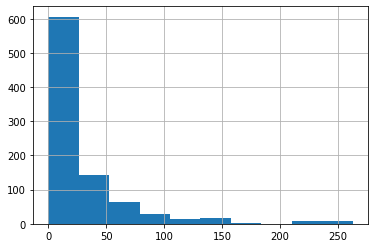

In [ ]:
new_train_data['Fare_per_person'].hist()

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(pd.DataFrame(new_train_data['Fare_per_person']))

StandardScaler()

In [ ]:
new_train_data['Fare_per_person'] = std_scaler.transform(pd.DataFrame(new_train_data['Fare_per_person']))

In [ ]:
def cate_fare(x):
    if x < 0.4:
        return 0
    elif x < 2.3:
        return 1
    else:
        return 2

In [ ]:
new_train_data['Fare_per_person'] = new_train_data['Fare_per_person'].apply(lambda x:cate_fare(x))

<AxesSubplot:xlabel='Fare_per_person', ylabel='count'>

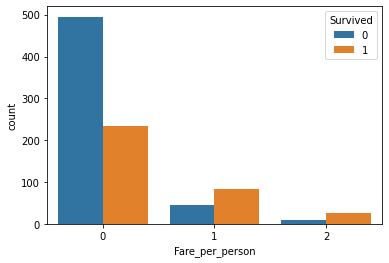

In [ ]:
sns.countplot(data=new_train_data,x='Fare_per_person',hue='Survived')

#### Cabin

In [ ]:
new_train_data['Cabin'] = new_train_data['Cabin'].fillna(0)
new_train_data['Cabin'] = new_train_data['Cabin'].apply(lambda x: 1 if x != 0 else 0)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

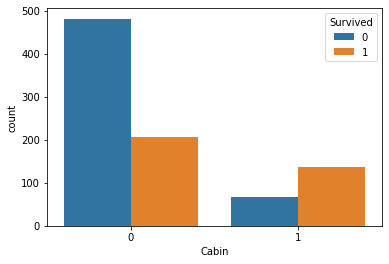

In [ ]:
sns.countplot(data=new_train_data,x='Cabin',hue='Survived')

#### Name

In [ ]:
def name_list(data):
    name_list = []
    for i in range(len(data)):
        find_bracket = re.search('\(',data.iloc[i]['Name'])
        first = re.search(',',data.iloc[i]['Name']).span()[0] 
        name_first = data.iloc[i]['Name'][:first]
        full_name = ""
        if find_bracket:
            full_name += data.iloc[i]['Name'][first+2:find_bracket.span()[0]] + " " + name_first
        else :
            full_name += data.iloc[i]['Name'][first+2:] + " " + name_first
        name_list.append(full_name)
    return name_list

In [ ]:
list_name = name_list(new_train_data)

In [ ]:
for i in list_name[:10]:
    print(i)

Mr. Owen Harris Braund
Mrs. John Bradley  Cumings
Miss. Laina Heikkinen
Mrs. Jacques Heath  Futrelle
Mr. William Henry Allen
Mr. James Moran
Mr. Timothy J McCarthy
Master. Gosta Leonard Palsson
Mrs. Oscar W  Johnson
Mrs. Nicholas  Nasser


In [ ]:
call = set()
for i in list_name:
    find_dot = re.search('\.',i).span()[0]
    first = ""
    if (find_dot):
        first = i[:find_dot]
    call.add(first)
print(call)

{'Mrs', 'Lady', 'Jonkheer', 'Col', 'Master', 'Mr', 'Mme', 'the Countess', 'Don', 'Capt', 'Mlle', 'Sir', 'Ms', 'Miss', 'Rev', 'Dr', 'Major'}


In [ ]:
def call_name_list(data,list_name):
    call_first = []
    for i in list_name:
        find_dot = re.search('\.',i).span()[0]
        first = ""
        if (find_dot):
            first = i[:find_dot]
        call_first.append(first)
    return call_first

In [ ]:
call_list = call_name_list(new_train_data,list_name)

In [ ]:
new_train_data['Name'] = call_list

In [ ]:
new_train_data['Name']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

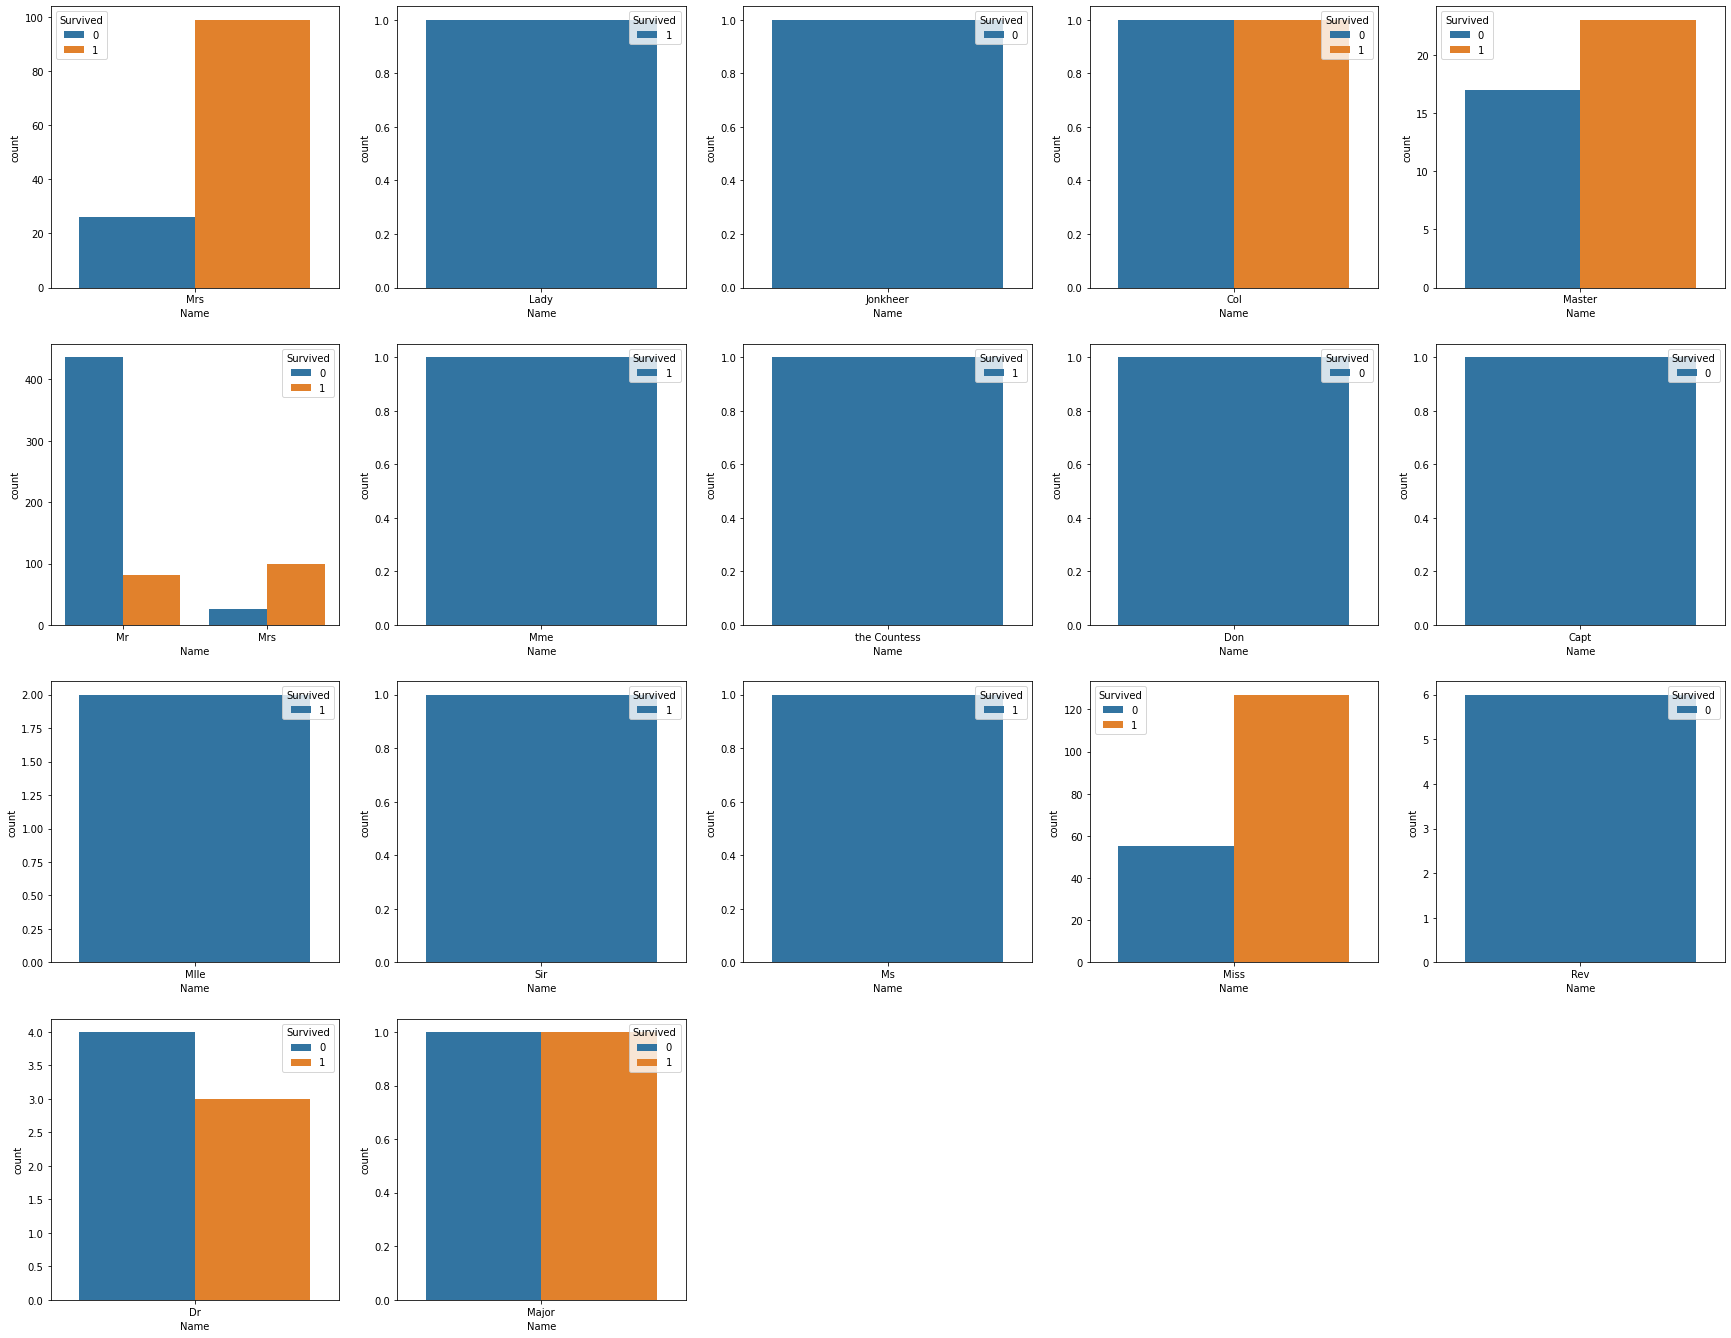

In [ ]:
row = 5
col = 5
index = 1
plt.figure(figsize = (30,30))
for call_ in call:
    test = new_train_data[new_train_data['Name'].str.contains(call_)]
    plt.subplot(row,col,index)
    index+=1
    sns.countplot(data = test,x='Name',hue='Survived')


People with ['Mrs','Miss','Ms','the Countess','Mlle','Master','Lady','Mme'] in 'Name' have a higher Survived rate

In [ ]:
def cate_name(name):
    if name in ['Mrs','Miss','Ms','the Countess','Mlle','Master','Lady','Mme']:
        return 1
    else:
        return 0

In [ ]:
new_train_data['Name'] = new_train_data['Name'].apply(lambda x:cate_name(x))

#### Embarked

In [ ]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    int64  
 4   Sex              891 non-null    object 
 5   Age              891 non-null    float64
 6   Ticket           891 non-null    object 
 7   Fare             891 non-null    float64
 8   Cabin            891 non-null    int64  
 9   Embarked         889 non-null    object 
 10  Relative_Family  891 non-null    int64  
 11  Fare_per_person  891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


fill NaN value by most frequent

In [ ]:
new_train_data['Embarked'] = new_train_data['Embarked'].fillna(new_train_data['Embarked'].value_counts().index[0])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

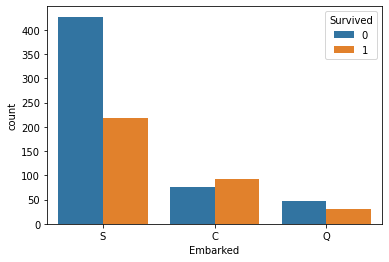

In [ ]:
sns.countplot(data=new_train_data,x='Embarked',hue='Survived')

In [ ]:
new_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative_Family,Fare_per_person
0,1,0,3,0,male,15.0,A/5 21171,7.2500,0,S,1,0
1,2,1,1,1,female,30.0,PC 17599,71.2833,1,C,1,1
2,3,1,3,1,female,15.0,STON/O2. 3101282,7.9250,0,S,0,0
3,4,1,1,1,female,30.0,113803,53.1000,1,S,1,1
4,5,0,3,0,male,30.0,373450,8.0500,0,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,male,15.0,211536,13.0000,0,S,0,0
887,888,1,1,1,female,15.0,112053,30.0000,1,S,0,0
888,889,0,3,1,female,15.0,W./C. 6607,23.4500,0,S,1,0
889,890,1,1,0,male,15.0,111369,30.0000,1,C,0,0


# Split

In [ ]:
train_split,test_split = train_test_split(new_train_data,test_size=0.2)

In [ ]:
def split_dropcol(data):
    return [data.drop(columns =['Survived','Ticket','Fare','PassengerId']),data['Survived']]

In [ ]:
X_train_split,Y_train_split = split_dropcol(train_split)

In [ ]:
X_train_split

,Pclass,Name,Sex,Age,Cabin,Embarked,Relative_Family,Fare_per_person
252,1,0,male,60.0,1,S,0,0
290,1,1,female,15.0,0,S,0,1
673,2,0,male,30.0,0,S,0,0
552,3,0,male,15.0,0,Q,0,0
830,3,1,female,15.0,0,C,1,0
...,...,...,...,...,...,...,...,...
181,2,0,male,15.0,0,C,0,0
735,3,0,male,15.0,0,S,0,0
156,3,1,female,15.0,0,Q,0,0
403,3,0,male,15.0,0,S,1,0


# Transform

In [ ]:
onehot = OneHotEncoder(sparse=False)

In [ ]:
X_train_split = onehot.fit_transform(X_train_split)

In [ ]:
X_train_split

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [ ]:
model = [RandomForestClassifier(),LogisticRegression(),XGBClassifier(),SGDClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

In [ ]:
scores = {}

In [ ]:
for i in model:
    scores[type(i).__name__] = cross_val_score(i,X_train_split,Y_train_split,cv=10)
    

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:09:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:09:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:09:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:09:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:
scores

{'RandomForestClassifier': array([0.875     , 0.77777778, 0.83098592, 0.8028169 , 0.85915493,
        0.81690141, 0.78873239, 0.77464789, 0.78873239, 0.84507042]),
 'LogisticRegression': array([0.875     , 0.77777778, 0.90140845, 0.77464789, 0.81690141,
        0.81690141, 0.73239437, 0.77464789, 0.81690141, 0.81690141]),
 'XGBClassifier': array([0.88888889, 0.77777778, 0.81690141, 0.77464789, 0.85915493,
        0.78873239, 0.78873239, 0.78873239, 0.77464789, 0.87323944]),
 'SGDClassifier': array([0.875     , 0.80555556, 0.87323944, 0.77464789, 0.69014085,
        0.73239437, 0.71830986, 0.74647887, 0.8028169 , 0.83098592]),
 'DecisionTreeClassifier': array([0.875     , 0.77777778, 0.8028169 , 0.78873239, 0.87323944,
        0.78873239, 0.78873239, 0.77464789, 0.77464789, 0.87323944]),
 'KNeighborsClassifier': array([0.86111111, 0.75      , 0.84507042, 0.76056338, 0.83098592,
        0.83098592, 0.85915493, 0.77464789, 0.78873239, 0.87323944]),
 'SVC': array([0.88888889, 0.80555556, 0

In [ ]:
scores = pd.DataFrame.from_dict(scores)

<AxesSubplot:>

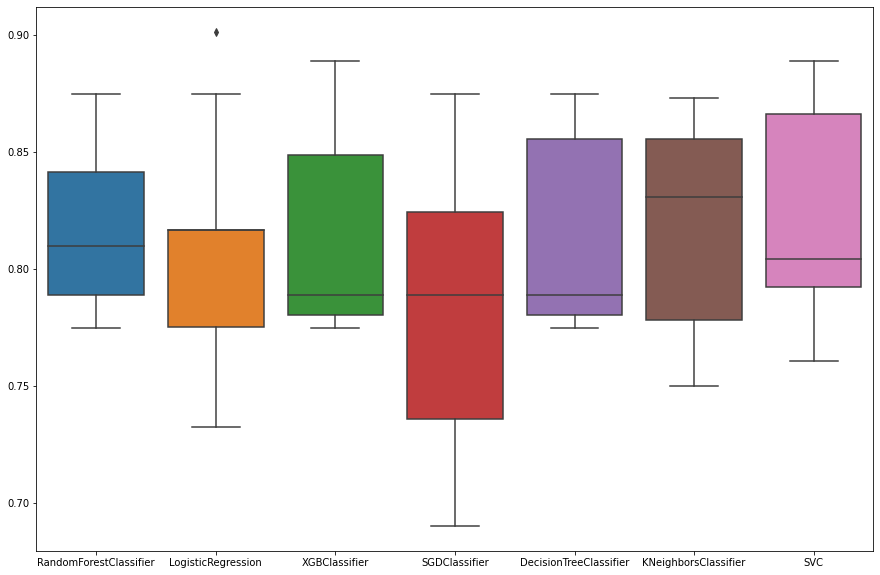

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(data = scores)

SVC and Random Forest are great

## Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_split,Y_train_split)

RandomForestClassifier()

In [ ]:
y_pred_rfc = cross_val_predict(rfc,X_train_split,Y_train_split,cv=10)

In [ ]:
accuracy_score(Y_train_split,y_pred_rfc)

0.8146067415730337

## SVC

In [ ]:
svc = SVC()
svc.fit(X_train_split,Y_train_split)

SVC()

In [ ]:
y_pred_rfc = cross_val_predict(svc,X_train_split,Y_train_split,cv=10)

In [ ]:
accuracy_score(Y_train_split,y_pred_rfc)

0.8230337078651685

# Grid Search

## Random Forest

In [ ]:
rfc_param_grid = [{
    'n_estimators': [i for i in range(100,130)],
    'criterion' : ["gini", "entropy"],
    'max_features' : [None, "sqrt", "log2"],
    'max_depth':[i for i in range(3,10)],
    # 'oob_score':[True,False]
}]

In [ ]:
grid_rfc = GridSearchCV(rfc,param_grid=rfc_param_grid,scoring = 'accuracy',cv = 10, verbose = 3)

In [ ]:
# grid_rfc.fit(X_train_split,Y_train_split)

In [ ]:
best_param_grid_rfc = {'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 108}

In [ ]:
improve_rfc = RandomForestClassifier(**best_param_grid_rfc)
improve_rfc.fit(X_train_split,Y_train_split)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=None,
                       n_estimators=108)

In [ ]:
y_pred_improve_rfc = improve_rfc.predict(X_train_split)
accuracy_score(Y_train_split,y_pred_improve_rfc)

0.827247191011236

## SVC

In [ ]:
svc_param_grid = [{
    'C': [0.1, 1, 10, 100, 1000],
    'gamma' : [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly',"sigmoid"],
    'decision_function_shape' : ['ovo','ovr'],
}]

In [ ]:
grid_svc = GridSearchCV(svc,param_grid=svc_param_grid,scoring = 'accuracy',cv = 10, verbose = 3)

In [ ]:
grid_svc.fit(X_train_split,Y_train_split)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, score=0.819, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, score=0.764, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, score=0.873, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, score=0.775, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, score=0.789, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=0.1, decision_function_sha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.817, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.831, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=poly ......
[CV]  C=0.1, decision_

[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   54.9s finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'gamma': [0.1, 1, 10, 100],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy', verbose=3)

In [ ]:
grid_svc.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'poly'}

In [ ]:
improve_svc = SVC(**grid_svc.best_params_)
improve_svc.fit(X_train_split,Y_train_split)

SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='poly')

In [ ]:
y_pred_improve_svc = improve_svc.predict(X_train_split)
accuracy_score(Y_train_split,y_pred_improve_svc)

0.8398876404494382

=> I choose SVC

## Test split

In [ ]:
x_test_split,y_test_split = split_dropcol(test_split)

In [ ]:
x_test_split = onehot.transform(x_test_split)

In [ ]:
y_test_pred = improve_svc.predict(x_test_split)

In [ ]:
cross_val_score(improve_rfc,x_test_split,y_test_pred,cv=3).mean()

0.9549905838041433